<a href="https://colab.research.google.com/github/AlessandroCaula/Machine_Learning_Project/blob/main/MNIST_Project_AlessandroCaula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning analysis of the MNIST database**

## **Master course in Bioinformatics**, University of Bologna


### Alessandro Caula

## Description of the MNIST digit recognition Project

The MNIST database (Modified National Institute of Standards and Technology database) is a large dataset that contains tens of thousands of scanned images of handwritten digits between 0 and 9, together with their correct classifications. The images are greyscaled and 28 by 28 pixel (784 total pixels per image).\
This set has been widely studied and it is often called the "hello world" of Machine Learning (ML). The task is to classify a given image of a handwritten digit into one of the 10 classes representing the numbers from 0 to 9.\
Different machine learning classification methods can be used on the dataset and we will see how their performances will be different in relatioin to their characteristics.  

## Import modules

In [ ]:
# Numpy
import numpy as np 

# Sklearn 
import sklearn 

# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mplt

# Pandas
import pandas as pd

# Seaborn
import seaborn as sns 

## Importing the MNIST dataset 

The first thing to do is to import and load the MNIST dataset, this can be easily done through the Keras API dataset module, that provide the MNIST dataset already vectorized and in Numpy format.\
The database contains 70'000 images and each image has 784 features, representing the 28 by 28 pixel's intesities ranging from 0 (white) to 255 (black). Out of the 70'000 examples, 60'000 are given for the training set and 10'000 are given for the test set.\
When load the dataset, the `images_train` and `images_test` numpy array will contain the handwritten images in greyscale RGB codes, while the `labels_train` and `labels_test` will contain the digits that correspond to the images. 







In [ ]:
from keras.datasets import mnist

# Loading the dataset and split it into train and test sets
(images_train, labels_train), (images_test, labels_test) = mnist.load_data()

# Visualize the shape of the train and test sets
print('The shape of the training and testing sets is:')
print(f"Images_train: {images_train.shape} Labels_train: {labels_train.shape}")
print(f"Images_test:  {images_test.shape}  Labels_test: {labels_test.shape}")

The shape of the training and testing sets is:
Images_train: (60000, 28, 28) Labels_train: (60000,)
Images_test:  (10000, 28, 28)  Labels_test: (10000,)


## Visualizing and inspecting the data

It's always good to visualize and familiarize with the dataset.\
I'll first display some of the images present in the `images_train` set matched with their corresponding labels, using the `matplotlib` library.

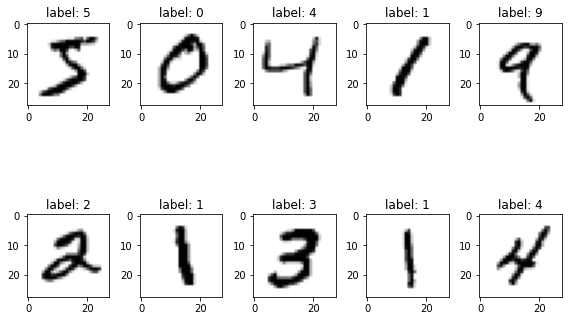

In [ ]:
# Plotting the first 10 images of the training dataset
fig, axs = plt.subplots(figsize=(8, 6))

for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(images_train[i], cmap='gray_r')
  plt.title(f'label: {labels_train[i]}')
plt.tight_layout()
plt.show()

In the plots all the images of handwritten digits correctly correspond to their labels.

We can also visualize how each number image is in detail represented using the heatmap graph representation.

The image of the number 5 is represented as: 



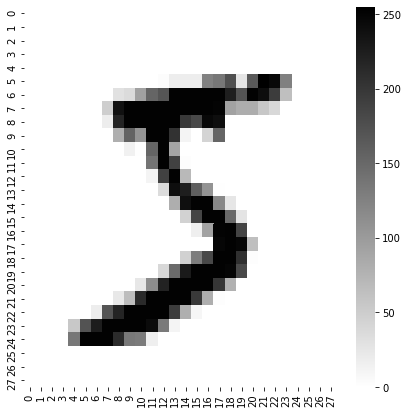

In [ ]:
print(f'The image of the number {labels_train[0]} is represented as: \n')

# Plotting the first number of the training dataset
plt.figure(figsize=(7, 7))

sns.heatmap(images_train[0], cmap='gray_r')

As we have already said and we can see here, the image is characterize with a 28 by 28 grid of pixel's intesity values ranging from 0 (white) to 255 (black).

We can now inspect if all the 10 classes (digit from 0 to 9) are equally represented in both the traininng and testing dataset by plotting their distribution, with the `seaborn` library.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Test Dataset Countplot')

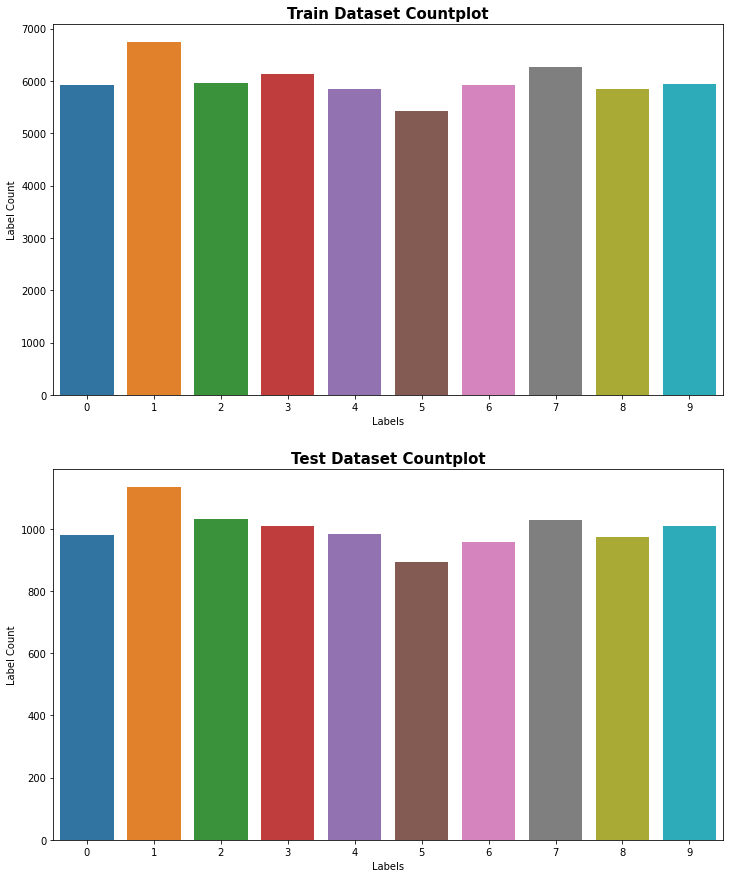

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 15))

# Countplot of the train dataset
countplot_train = sns.countplot(labels_train, ax=ax[0])
countplot_train.set(xlabel='Labels', ylabel='Label Count')
countplot_train.set_title('Train Dataset Countplot', 
                          fontdict={'fontsize': 15, 'fontweight': 'bold'})

# Countplot of the test dataset
countplot_test = sns.countplot(labels_test, ax=ax[1])
countplot_test.set(xlabel='Labels', ylabel='Label Count')
countplot_test.set_title('Test Dataset Countplot', 
                         fontdict={'fontsize': 15, 'fontweight': 'bold'})

As we can see in this plot the distribution of the different classes in both the train and test set is quite uniform, only the digit "1" is a little bit overrepresented, but this should not affect the performances of the classification models.

## **Decision Tree**

The first Machine Learning method that I will test, uses the construction of a Decision Tree. This approach belogs to the category of the supervised machine learning methods and the models can be used for both classification and regression problems.\
A decision tree is represented with a tree structure where each internal node denotes a test on an attribute, each branch represent the outcome of the test and each leaf holds a class label.  

In [ ]:
# First formatting (flattening) the training and testing matrix inputs
images_train_flt = images_train.flatten().reshape(60000, 784)
images_test_flt = images_test.flatten().reshape(10000, 784)
print("Images_train_flt shape: {}".format(images_train_flt.shape))
print("Images_test_flt shape: {}".format(images_test_flt.shape))

Images_train_flt shape: (60000, 784)
Images_test_flt shape: (10000, 784)


In [ ]:
# Importing the DecisionTreeClassifier modules
from sklearn.tree import DecisionTreeClassifier

# Building the Decision Tree model with the training set
dt_classifier = DecisionTreeClassifier()

# Fitting the Decision Tree with the raining dataset
dt_classifier.fit(images_train_flt, labels_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now that I have built and trained the model with the training set, I can predict the classes of the test set and evaluate the predictions of the Decision Tree Classifier model.

In [ ]:
# Predicting the labels of the test set images with the Decision Tree model
dt_labels_pred = dt_classifier.predict(images_test_flt)

# Printing 20 of the actual labels of the testing set compared to the predicted labels 
print("Actual classes:   ", labels_test[:29])
print("Predicted classes:", dt_labels_pred[:29])

Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0]
Predicted classes: [7 2 1 0 4 1 4 0 5 9 0 6 9 0 1 5 9 7 6 4 9 6 6 5 4 0 7 4 0]


As we can see from these first 30 labels predicted most of them are in agreement with the actual labels of the images.  

Now that we have the predicted class of the test set we can compute the confusion matrix and all the evaluation metrics in which we are interested in order to evaluate the preformances of the Decision Tree model. 

Text(62.5, 0.5, 'Actual')

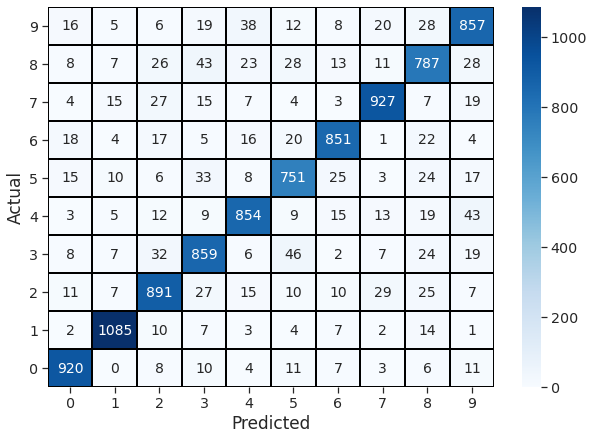

In [ ]:
from sklearn.metrics import confusion_matrix

# Computing the confusion matrix with the actual and predicted labels
dt_cf_matrix = confusion_matrix(labels_test, dt_labels_pred)

# Printing the confusion matrix as an heatmap
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.3)
sns.set_style('ticks')
ax = sns.heatmap(dt_cf_matrix, 
            annot=True, 
            fmt="d", 
            annot_kws={"size": 14}, 
            cmap='Blues',
            linewidths=1,
            linecolor='black')

ax.invert_yaxis()
plt.yticks(rotation=0) 
plt.xlabel("Predicted", fontdict={'fontsize': 17})
plt.ylabel("Actual", fontdict={'fontsize': 17})

The Confusion Matrix shows how most of the images are correctly classified, even if there are still some misclassification. We can agree that the classification capability of the model is not bad. 

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Computing the Classification Report
c_report = classification_report(labels_test, dt_labels_pred)
print("Classificatio Report:")
print()
print(c_report)

Classificatio Report:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.86      0.86      1032
           3       0.84      0.85      0.84      1010
           4       0.88      0.87      0.87       982
           5       0.84      0.84      0.84       892
           6       0.90      0.89      0.90       958
           7       0.91      0.90      0.91      1028
           8       0.82      0.81      0.82       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



From the Classificatio Report we can see some of the evaluation metrics (precision, recall and f1-score) computed both for each of the 10 digit classes present in the MNIST dataset and averaged between them. The `support` entry specifies the number of actual occurrences of the class in the dataset. 

In [ ]:
# Computing the accuracy of the model 
acc = accuracy_score(labels_test, dt_labels_pred)
print(f"- Accuracy of the model: {acc} \n")


# To compute the Area Under the ROC Curve I first have to binarize the labels of the actual and predicted classes.
# For example the label '7' will be represented as [0 0 0 0 0 0 0 1 0 0]
from sklearn.preprocessing import label_binarize

# Label to binarize 
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Binarize the labels_test
labels_test_bin = label_binarize(labels_test, classes=labels)

# Binarize the dt_labels_pred
dt_labels_pred_bin = label_binarize(dt_labels_pred, classes=labels)

# Computing the AUC for each labels in a One-Vs-Rest fashion
roc = roc_auc_score(labels_test_bin, dt_labels_pred_bin, average=None, multi_class='ovr')

print('- AUC score for each of the classes:')
for i, lab in enumerate(labels):
  print(f'class: {lab} -> AUC: {roc[i]}')
print(f'\n- Average AUC score: {np.mean(roc):.4}')

- Accuracy of the model: 0.8782 

- AUC score for each of the classes:
class: 0 -> AUC: 0.9646760034390698
class: 1 -> AUC: 0.9745894735272853
class: 2 -> AUC: 0.9236575005705039
class: 3 -> AUC: 0.9159038095133206
class: 4 -> AUC: 0.928173523963614
class: 5 -> AUC: 0.9130589872206171
class: 6 -> AUC: 0.9391777134679776
class: 7 -> AUC: 0.945915611214136
class: 8 -> AUC: 0.8946422632131407
class: 9 -> AUC: 0.9163918350681923

- Average AUC score: 0.9316


An accuracy of 87% and an AUC score of 0.93 denotes indeed that the model performances are not bad. However, we'll see that there are other ML classification models that can perform much better. 

## **Random forest**

Random forest is an ensemble supervised learning algorithm that can be used for both classification and regression problems.\
The model works by constructing a moltitude of uncorrelated decision trees at training time and it will outputting, in case of the classification problems, the class that is the "most voted" of the classes predicted from all the decisions tree belonging to the random forest, and the mean/average prediction of the individual trees when performing regression problems.\
Random forest generally outperform decision trees since they are less prone to overfitting. 

In [ ]:
# Importing RandomForestClassifier module
from sklearn.ensemble import RandomForestClassifier

# Building the Random Forest Classifier with 100 estimators (number of Decision tree in the Random Forest enseble)
rf_classifier = RandomForestClassifier(n_estimators=100)

# Training the Random Forest ensemble with the training dataset
rf_classifier.fit(images_train_flt, labels_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Now that I've build and trained the random forest classifier I can predict the classes of the testing set and evaluate the preformances of the model. 

In [ ]:
# Predicting the classes of the images of the testing set
rf_labels_pred = rf_classifier.predict(images_test_flt)

# I'll print 30 of the actual classes compared to the predicted classes
print("Actual classes:   ", labels_test[:29])
print("Predicted classes:", rf_labels_pred[:29])

Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0]
Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0]


I can now generate the confusion matrix and evaluate the model performances comparing its evaluation metrics with the one obtained from the decision tree model.

Text(62.5, 0.5, 'Actual')

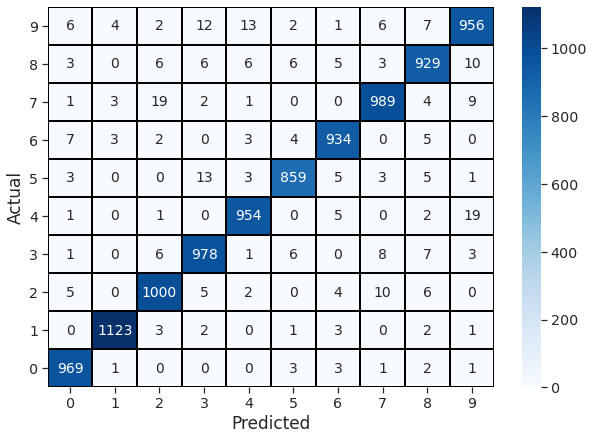

In [ ]:
from sklearn.metrics import confusion_matrix

# Computing the confusion matrix with the actual and predicted labels
rf_cf_matrix = confusion_matrix(labels_test, rf_labels_pred)

# Printing the confusion matrix as an heatmap
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.3)
sns.set_style('ticks')
ax = sns.heatmap(rf_cf_matrix, 
                annot=True, 
                fmt="d", 
                annot_kws={"size": 14}, 
                cmap='Blues',
                linewidths=1,
                linecolor='black')

ax.invert_yaxis()
plt.yticks(rotation=0) 
plt.xlabel("Predicted", fontdict={'fontsize': 17})
plt.ylabel("Actual", fontdict={'fontsize': 17})

As shown in the Confusion Matrix almost all the  images of the test set are correctly predicted with their correct labels (digit).\
We can also already see that the correctly predicted classes are higher that the one obtained from the decision tree.

In [ ]:
from sklearn.metrics import classification_report

# Computing the Classification Report
c_report = classification_report(labels_test, rf_labels_pred)
print("Classificatio Report:")
print()
print(c_report)

Classificatio Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Printing Accuracy and AUC score for the random forest classifier.

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Computing the accuracy of the model 
acc = accuracy_score(labels_test, rf_labels_pred)
print(f"- Accuracy of the model: {acc} \n")

# To compute the Area Under the ROC Curve I first have to binarize the labels of the actual and predicted classes.
# For example the label '7' will be represented as [0 0 0 0 0 0 0 1 0 0]

# Label to binarize 
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Binarize the labels_test
labels_test_bin = label_binarize(labels_test, classes=labels)

# Binarize the dt_labels_pred
rf_labels_pred_bin = label_binarize(rf_labels_pred, classes=labels)

# Computing the AUC for each labels in a One-Vs-Rest fashion
roc = roc_auc_score(labels_test_bin, rf_labels_pred_bin, average=None, multi_class='ovr')

print('- AUC score for each of the classes:')
for i, lab in enumerate(labels):
  print(f'class: {lab} -> AUC: {roc[i]}')
print(f'\n- Average AUC score: {np.mean(roc):.4}')

- Accuracy of the model: 0.9691 

- AUC score for each of the classes:
class: 0 -> AUC: 0.9928910810443912
class: 1 -> AUC: 0.9940932390159788
class: 2 -> AUC: 0.9823217261719533
class: 3 -> AUC: 0.9819337217370235
class: 4 -> AUC: 0.9841354855349269
class: 5 -> AUC: 0.9802945126838674
class: 6 -> AUC: 0.9860361689522198
class: 7 -> AUC: 0.9793035314363233
class: 8 -> AUC: 0.9746835630219066
class: 9 -> AUC: 0.971289481310404

- Average AUC score: 0.9827


The accuracy has reached a remarkable 97% and the AUC score is 0.98, as we expeted this highlights a significantly increase of the classification performances in respect to the ones obtained with the decision tree model. 

## **Cross-validation procedure**

Cross Validation (CV) is a resampling technique used for assessing the effectiveness and consistency of the model performances, particularly in cases where it's important to mitigate overfitting.\
Here I used the k-fold cross validation method that taken the original training set it is randomly partitioned into *k* (*k*=10 in this case) subsamples of equal size. Of these *k* subsamples, a single subsample is retained as the testing set for the model, that is trained using the remaining *k-1* subsamples. The cross-validation procedure is repeated *k* times, with each of the *k* subsamples used exactly once as the validation dataset.   

I will perform the cross validation procedure with the Decision Tree and the Random Forest Classifiers.  
Since our dataset is made up with lots of example (70000 images) we are able to perform a 10-fold cross vaidation, that is the gold standard for the number of folds in the cross validations procedure.  
If the dataset was smaller we should have also try the 5-fold cross validation. 

In [ ]:
from sklearn.model_selection import cross_val_score

# Data preparation
# Joining the training and the testing sets of both the images and the labels
tot_images_flt = np.vstack((images_train_flt, images_test_flt))
tot_labels = np.concatenate((labels_train, labels_test))

# Defining two dictionaries in which the results will be stored 
results_dt = {}
results_rf = {}

# Defining an array with the metric scores in which we are interested
scores = ['accuracy', 'roc_auc_ovr']

# Cross-validation with Decision Tree
for metric in scores:
  result_cv_dt = cross_val_score(dt_classifier, tot_images_flt, tot_labels, cv=10, scoring=metric)
  results_dt[metric] = result_cv_dt

# Cross-validation with Random Forest
for metric in scores:
  result_cv_rf = cross_val_score(rf_classifier, tot_images_flt, tot_labels, cv=10, scoring=metric)
  results_rf[metric] = result_cv_rf

Printing the results:

In [ ]:
print('- DECISION TREE')
# print(f'\nThe Accuracy of each of the 10 fold cross validation are:')
# for i, val in enumerate(results_dt['accuracy'], 1):
#   print(f'{i}° cv -> {val}')
print('\nThe mean Accuracy of the 10 fold cross validation accuracy results is:', np.mean(results_dt['accuracy']))
print('\nThe mean AUC score of the 10 fold cross validation AUC results is:', np.mean(results_dt['roc_auc_ovr']))

print('\n- RANDOM FOREST')
print('\nThe mean Accuracy of the 10 fold cross validation accuracy results is:', np.mean(results_rf['accuracy']))
print('\nThe mean AUC score of the 10 fold cross validation AUC results is:', np.mean(results_rf['roc_auc_ovr']))


- DECISION TREE

The mean Accuracy of the 10 fold cross validation accuracy results is: 0.8732428571428571

The mean AUC score of the 10 fold cross validation AUC results is: 0.9288820656440654

- RANDOM FOREST

The mean Accuracy of the 10 fold cross validation accuracy results is: 0.9688714285714287

The mean AUC score of the 10 fold cross validation AUC results is: 0.9990291259682389


For both the models that have been 10-fold cross validated the mean accuracy and AUC score obtained are very similar to the accuracy and AUC score achieved from the models when we have used a simple train/test split.\
This indicates a general consistency of the model performances in predicting the classes of the MNIST images and that there is no effect of overfitting during the training phase of the models. 

## **CNN**

Convolutional Neural Network (CNN) are one of the most common classes of Machine Learning models used to analyse visual images like the MNIST dataset.\
CNN are composed of multiple layers of artificial neurons, where the behavior of each neuron is defined by its weights. When fed with the pixel values of an image, the artificial neurons of a CNN pick out various visual features learning how to extract them, and eventually infer what object they constitute.\
The general architecture of CNN consists of an input and output layer, together with multiple hidden layers. The hidden layers are either convulutional, pooling, flattening or fully connected layers.

## Preparing the data

#### Normalization

First thing to do before the construction of the model is the preparation of the data by performing a normalization of 28x28 greyscale values, dividing by 255 the RGB codes of each pixel in `images_train` and `images_test`, we'll therefore obtain intesity values of the pixels between 0 and 1. Indeed CNN converg faster on [0..1] data than [0..255]. 

In [ ]:
# Normalizing the data
images_train = images_train / 255.0
images_test = images_test / 255.0

#### Reshaping 

I also wanto the reshape both the `images_train` and `images_test` arrays in 4-Dimensions numpy arrays (n° of examples, height=28px, width=28px, canal=1).\
In this way I will be able to work with the Keras API. Keras requires an extra dimension in the end which correspond to the canal, and since MNIST images are gray scaled it is used only one channel.

In [ ]:
# Reshaping the arrays
images_train_3d = images_train.reshape(images_train.shape[0], 28, 28, 1)
images_test_3d = images_test.reshape(images_test.shape[0], 28, 28, 1)
print("Images training:", images_train_3d.shape)
print("Images testing:", images_test_3d.shape)

Images training: (60000, 28, 28, 1)
Images testing: (10000, 28, 28, 1)


#### Converting to hot vectors

Another important procedure is to convert the labels digits (numbers from 0 to 9) of the training and test labels arrays into hot vectors.\
This can be achieved using the `keras.utils.to_categorical` module which creates a binary vector as long as the number of classes that we have (10) in which there will be all zero values except the index of the integer, which is marked with a 1 (ex: 2 $\rightarrow$ [0,0,1,0,0,0,0,0,0,0]).

In [ ]:
from keras.utils.np_utils import to_categorical

# Encode labels into hot vectors
labels_train_hv = to_categorical(labels_train, num_classes=10)
labels_test_hv = to_categorical(labels_test, num_classes=10)
print("Example:")
print("Digit label: {} --> hot vector: {}".format(labels_train[0], labels_train_hv[0]))

Example:
Digit label: 5 --> hot vector: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Building and training the model

Now that the data is ready to be fit to the model, we need to define the architecture of the model and compile it with the necessary *optimizer function*, *loss function* and *performance metrics*.\
For this purpose I will use the Keras `Sequential` API that allows to add to the model one layer at a time, starting from the input one.\
The first two layers will be `Conv2D` layers of 64 and 32 neurons respectively, with a `ReLU` activation function and a `kernel size` of 3.
I will then add a `Flatten` layers, which is used as connection between the convolutional and dense layer; the final `Dense` layer will be used for the output layer, with a `softmax` activation function. This output layer will have 10 nodes, the classes that we have to predict.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Model creation
cnn_model = Sequential()

# Add model layers
cnn_model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(Conv2D(32, kernel_size=3, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))

# Visualizing the final architecture of the Neural Network
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


Now that I've built the structure of the model, I have to compile it by defining an optimizer that controls and changes the attributes of the neural network (such as weights and learning rate) in order to minimize the losses, and the evaluation metrics.\
I will use the `adam` optimizer, the `categorical_crossentropy` as loss function and the `accuracy` as performace metric. 

In [ ]:
# Compiling the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.AUC()]) 

I can now train the model:

In [ ]:
# Defining the number epochs and the batch-size dimension.
epochs = 20
batch_size = 60

# Trining the model
cnn_history = cnn_model.fit(images_train_3d, 
                            labels_train_hv,  
                            batch_size=batch_size,
                            validation_data=(images_test_3d, labels_test_hv),
                            epochs=epochs)

Epoch 1/20
1000/1000 [==============================] - 39s 10ms/step - loss: 0.1435 - accuracy: 0.9574 - auc: 0.9975 - val_loss: 0.0852 - val_accuracy: 0.9747 - val_auc: 0.9984
Epoch 2/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0500 - accuracy: 0.9844 - auc: 0.9993 - val_loss: 0.0513 - val_accuracy: 0.9829 - val_auc: 0.9993
Epoch 3/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0341 - accuracy: 0.9892 - auc: 0.9995 - val_loss: 0.0469 - val_accuracy: 0.9868 - val_auc: 0.9990
Epoch 4/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0241 - accuracy: 0.9923 - auc: 0.9998 - val_loss: 0.0478 - val_accuracy: 0.9856 - val_auc: 0.9988
Epoch 5/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0171 - accuracy: 0.9944 - auc: 0.9998 - val_loss: 0.0602 - val_accuracy: 0.9835 - val_auc: 0.9983
Epoch 6/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0134 - accuracy: 0.9954 - auc:

### Evaluate the model 

We can now evaluate the model performances computing the `cross entropy loss`, `accuracy` and `AUC` scores, obtained by comparing the predicted the images of the `images_test_3d` with the actual class present in the `images_test_hv` array.  

In [ ]:
# Evalutating the model
score = cnn_model.evaluate(images_test_3d, labels_test_hv, verbose=0)
print('Test cross entropy loss:', score[0])
print('\nTest classification accuracy:', score[1])
print('\nTest classification AUC:', score[2])

Test cross entropy loss: 0.11825521290302277

Test classification accuracy: 0.9866999983787537

Test classification AUC: 0.9955877661705017


Just by using this simple CNN architechture, the accuracy, the AUC score and the cross entropy loss of the model performances highlights some very good results, indeed compared to the performances of the Random Forest model (accuracy = 97%) we have a quite but significant improvement. 

I will now display the training and validation (test) curves of the model behaviour during the epochs.\
These plots are important for getting an idea of whether a model is overfitting, underfitting or have a good fit for the dataset.

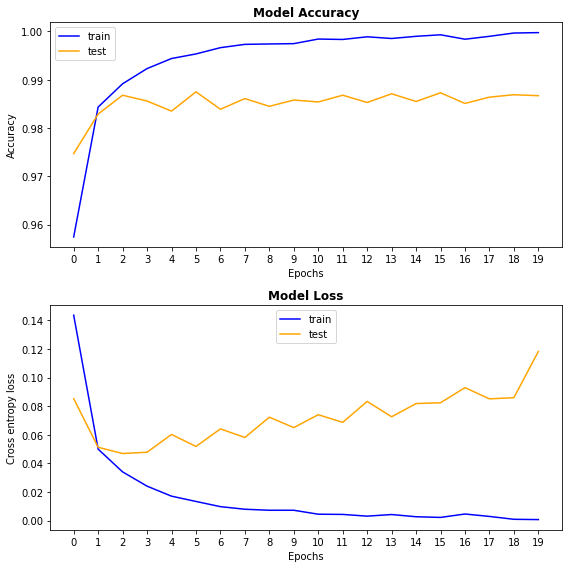

In [ ]:
# Plotting the Model Accuracy
fig = plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(cnn_history.history['accuracy'], color='blue')
plt.plot(cnn_history.history['val_accuracy'], color='orange')
plt.title('Model Accuracy', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 20))
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

# Plotting the Model Loss 
plt.subplot(2, 1, 2)
plt.plot(cnn_history.history['loss'], color='blue')
plt.plot(cnn_history.history['val_loss'], color='orange')
plt.title('Model Loss', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 20))
plt.ylabel('Cross entropy loss')
plt.legend(['train', 'test'], loc='upper center')

plt.tight_layout()

From these plots it's clear how the model is overfitting the training data. Indeed while the cross entropy loss of the training data is decreasing, the cross entropy loss of the test data is increasing, this means that the model is learning very well the training data, picking up all the details and the noise of the data but it is not able to then generalize on the test data.  
To overcome this problem and improve the model performances, I can make some changes to the architecture of the Neuran Network model.  

### Building and training the improved CNN model

One way to mitigate the overfitting risk in CNN is to add to the model a `Dropout` layer. This layer works by randomly ignoring some neurons of the hidden layers at each update of the training phase by setting their outgoing edges to 0. I will set the dropout rate equal to 0.5, so that there will be a 50% chance that the output of a give neuron will be forced to 0 (ignored).\
I will also add a `MaxPooling2D` layer after the two convolutional layers, this will reduce the dimensionality of the images by reducing the nuber of pixels from the output of the previous convolutional layer.\
In this way I will reduce the computational load through dimensionality reduction, this procedure will also help to prevent overfitting.

In [ ]:
# Importing the modules
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D

# Model creation
cnn_model_1 = Sequential()

# Add model layers
cnn_model_1.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
cnn_model_1.add(MaxPool2D(pool_size=(2,2)))
cnn_model_1.add(Conv2D(32, kernel_size=3, activation='relu'))
cnn_model_1.add(MaxPool2D(pool_size=(2,2)))
cnn_model_1.add(Flatten())
cnn_model_1.add(Dropout(0.5))
cnn_model_1.add(Dense(10, activation='softmax'))

# Visualizing the final architecture of the Neural Network
cnn_model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
#Compiling the model
cnn_model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.AUC()])

In [ ]:
epochs = 20
batch_size = 60

#Training of the model
cnn_history_1 = cnn_model_1.fit(images_train_3d, 
                                labels_train_hv,  
                                batch_size=batch_size,
                                validation_data=(images_test_3d, labels_test_hv),
                                epochs=epochs)

Epoch 1/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0346 - accuracy: 0.9888 - auc_1: 0.9996 - val_loss: 0.0233 - val_accuracy: 0.9925 - val_auc_1: 0.9997
Epoch 2/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0338 - accuracy: 0.9886 - auc_1: 0.9997 - val_loss: 0.0224 - val_accuracy: 0.9936 - val_auc_1: 0.9998
Epoch 3/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0327 - accuracy: 0.9896 - auc_1: 0.9997 - val_loss: 0.0226 - val_accuracy: 0.9916 - val_auc_1: 0.9997
Epoch 4/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0325 - accuracy: 0.9899 - auc_1: 0.9996 - val_loss: 0.0215 - val_accuracy: 0.9932 - val_auc_1: 0.9999
Epoch 5/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0305 - accuracy: 0.9901 - auc_1: 0.9997 - val_loss: 0.0213 - val_accuracy: 0.9930 - val_auc_1: 0.9997
Epoch 6/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0313 - acc

### Evaluate the model

In [ ]:
# Evaluating the model
score_1 = cnn_model_1.evaluate(images_test_3d, labels_test_hv, verbose=0)
print('Test cross entropy loss:', score_1[0])
print('\nTest classification accuracy:', score_1[1])
print('\nTest classification AUC:', score_1[2])

Test cross entropy loss: 0.021115969866514206

Test classification accuracy: 0.9940999746322632

Test classification AUC: 0.999759316444397


By changing the architecture of the CNN, the Accuracy and AUC performances of the model have further increased, moreover the loss cross entropy is significantly smaller than the one obtained with the first CNN model, all these metrics confirm the goodness of the model and the better prediction ability in respect to the first model.

I can now plot the training and validation curves of the model behaviour during the different epochs, to see if the model is still overfitting the data.

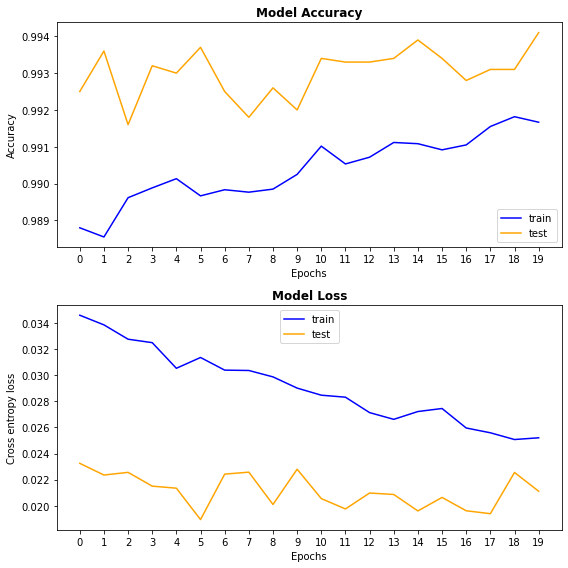

In [ ]:
# Plotting the Model Accuracy
fig = plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(cnn_history_1.history['accuracy'], color='blue')
plt.plot(cnn_history_1.history['val_accuracy'], color='orange')
plt.title('Model Accuracy', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 20))
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

# Plotting the Model Loss 
plt.subplot(2, 1, 2)
plt.plot(cnn_history_1.history['loss'], color='blue')
plt.plot(cnn_history_1.history['val_loss'], color='orange')
plt.title('Model Loss', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 20))
plt.ylabel('Cross entropy loss')
plt.legend(['train', 'test'], loc='upper center')

plt.tight_layout()

It is clear now that the model is not overfitting the training data since the cross-entropy loss of the test data is decreasing as the cross-entropy loss of the training data decreases.\
In general the model shows a very good performances, even if it could always be improved using more complex CNN architectures.

With this work we have highlighted how the simpler models, such as the Decision Tree and the Random Forest Classifiers are not able to achieve the same very high accuracy score obtained instead from the more complex and better suited CNN models. 
 